In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np 
import sklearn
print(cv2.__version__)
print(np.__version__)
print(sklearn.__version__)

4.0.1
1.18.5
0.23.1


In [2]:
print("Hello World!")
img = cv2.imread("lena.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Hello World!


Text(0.5, 1.0, 'Lena Color')

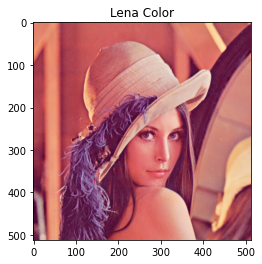

In [3]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title("Lena Color")

Text(0.5, 1.0, 'Lena Grayscale')

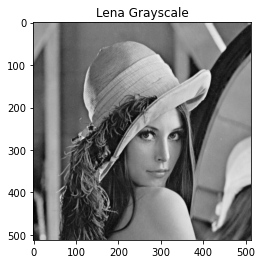

In [4]:
plt.imshow(gray, cmap = 'gray')
plt.title("Lena Grayscale")

In [5]:
print(img.shape[0])
print(img.size)
print(img.dtype)

512
786432
uint8


In [6]:
def flipHorizontal(img,shape): 
    horizontal = np.zeros(shape,np.uint8)
    
    for i in range(shape[0]): 
        horizontal[i,:] = img[shape[1]-1-i,:]
    return horizontal

def flipVertical(img,shape): 
    vertical = np.zeros(shape,np.uint8)
    
    for i in range(shape[1]): 
        vertical[:,i] = img[:,shape[1]-1-i]
    return vertical
shape = img.shape



Text(0.5, 1.0, 'Lena Color Flipped Vertically')

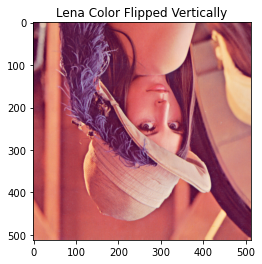

In [7]:
horizontalFlip = cv2.cvtColor(flipHorizontal(img,shape),cv2.COLOR_BGR2RGB)
plt.imshow(horizontalFlip)
plt.title("Lena Color Flipped Vertically")

Text(0.5, 1.0, 'Lena Grayscale Flipped Vertically')

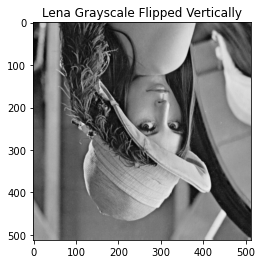

In [8]:
grayFlippedHorizontal = cv2.cvtColor(flipHorizontal(img,shape),cv2.COLOR_BGR2GRAY)
plt.imshow(grayFlippedHorizontal, cmap = 'gray')
plt.title("Lena Grayscale Flipped Vertically")

Text(0.5, 1.0, 'Lena Color Flipped Horizontally')

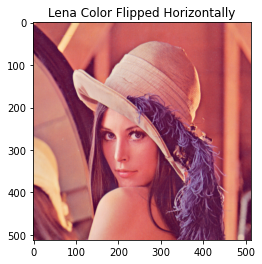

In [9]:
verticalFlip = cv2.cvtColor(flipVertical(img,shape),cv2.COLOR_BGR2RGB)
plt.imshow(verticalFlip)
plt.title("Lena Color Flipped Horizontally")

Text(0.5, 1.0, 'Lena Grayscale Flipped Horizontally')

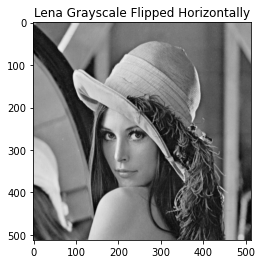

In [10]:
grayFlippedVertical = cv2.cvtColor(flipVertical(img,shape),cv2.COLOR_BGR2GRAY)
plt.imshow(grayFlippedVertical, cmap = 'gray')
plt.title("Lena Grayscale Flipped Horizontally")

In [11]:
def negate(img,shape):
    negatedImg = img
    row = shape[0]
    column = shape[1]
    
    for i in range(0,column - 1): 
        for j in range(0, row -1): 
            pixel = negatedImg[i,j]
            pixel[0] = 255 - pixel[0]
            pixel[1] = 255 - pixel[1]
            pixel[2] = 255 - pixel[2]
    return negatedImg

Text(0.5, 1.0, 'Lena inverted')

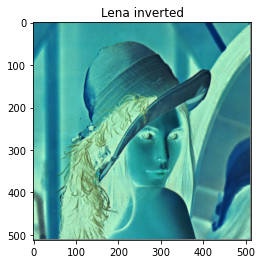

In [12]:
negatedImg = cv2.cvtColor(negate(img,shape),cv2.COLOR_BGR2RGB)
plt.imshow(negatedImg)
plt.title("Lena inverted")

Text(0.5, 1.0, 'Lena inverted Gray')

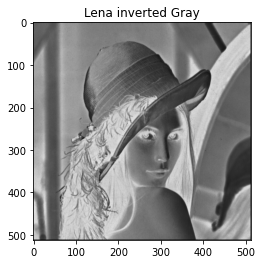

In [19]:
def negate_gray(gray,shape): 
    negated_gray = np.zeros(shape,np.uint8)
    row = shape[0]
    column = shape[1]
    
    for i in range(0,column - 1): 
        for j in range(0, row -1): 
            pixel = gray[i,j]
            negated_gray[i,j] = 255 - pixel
            
    return negated_gray
    
negatedImgGray = cv2.cvtColor(negate_gray(gray,gray.shape),0)
plt.imshow(negatedImgGray, cmap = 'gray')
plt.title("Lena inverted Gray")


In [20]:
def seperateChannels(img,shape):
    red, green, blue = np.zeros(shape,np.uint8),np.zeros(shape,np.uint8),np.zeros(shape,np.uint8)
    
    row = shape[0]
    column = shape[1]
     
            
    for i in range(0,column-1):
        for j in range(0, row-1):
            pixel = img[i,j]
            red[i,j] = [0,0,pixel[2]]
            
            green[i,j] = [0,pixel[1],0]
            
            blue[i,j] = [pixel[0],0,0]
    
            
    return [red,green,blue]

Text(0.5, 1.0, 'Lena Red Image')

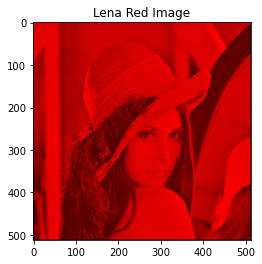

In [21]:
channels = seperateChannels(img,shape)
red = cv2.cvtColor(channels[0],cv2.COLOR_BGR2RGB)
green = cv2.cvtColor(channels[1],cv2.COLOR_BGR2RGB)
blue = cv2.cvtColor(channels[2],cv2.COLOR_BGR2RGB)

plt.imshow(red)
plt.title("Lena Red Image")



Text(0.5, 1.0, 'Lena Green Image')

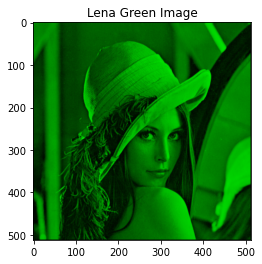

In [22]:
plt.imshow(green)
plt.title("Lena Green Image")

Text(0.5, 1.0, 'Lena Blue Image')

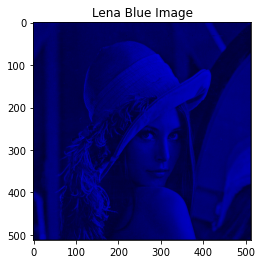

In [23]:
plt.imshow(blue)
plt.title("Lena Blue Image")

Text(0.5, 1.0, 'Merged Lena ')

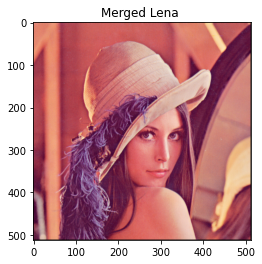

In [18]:
mergedImage = np.zeros(shape,np.uint8)
for i in range(0,shape[1]-1):
        for j in range(0, shape[0]-1):
            mergedImage[i,j] = [blue[i,j][2],green[i,j][1],red[i,j][0]]
            
mergedImage = cv2.cvtColor(mergedImage,cv2.COLOR_BGR2RGB)

plt.imshow(mergedImage)
plt.title("Merged Lena ")
